#    TP03: Régression logistique

 La ***régression logistique*** est une autre technique supervisé utilisé en machine learning. C'est la méthode de classification pour les problèmes avec deux classes(0/1).
 
 ## I-Algorithm du Gradient de descent
 
 -***Hypothèses***: $h_\theta(x)= \frac{1}{1+\exp(-\theta^Tx)}$
 
 $h_\theta(x)> 0,5 $  quand la classe (étiquette) vaut $Y=1$.
    
$h_\theta(x) < 0,5$  quand la classe (étiquette) vaut $Y=0$.
 
 ***Paramètres du model***: $\theta$ avec $m$ examples, $n $ variables
 
***Fonction du coût***:$J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i))$
 
***Objectif***: Trouver les meilleurs paramètres $\theta$  revient à minimiser  la fonction du coût.
		$	\min_{\theta}J(\theta)$	
		
		
***Algorithme du Gradient de descent***: $ \theta_j=\theta_j-\alpha	\frac{1}{m}\sum_{i=0}^{m} (h_\theta(x(i))-y(i))x_j(i)$


### 1. Recuperation des données
#### ***Q1***
   -utilisez la fonction ***make_blobs(n_samples,centers, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer deux classes puis visualiser les deux classes comme suivants:
*   rouge: y=0
*   blue: y=1
<img src="log.png" style="with:150px;height:280px"/>

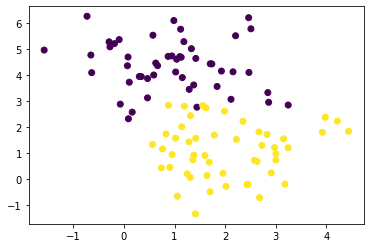

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
x,y=make_blobs(n_samples=100,centers=2,n_features=2,random_state=0)
plt.scatter(x[:,0],x[:,1],c=y)

#### ***Q2***   
          -a)Corriger les dimentions avec np.reshape
      
          -b)Créez la matrice X
          
          -c) Créez le vecteur $\theta$ (initialisé avec des coefficients nuls)

In [2]:
#a
y=np.reshape(y,(100,1))
#b
X=np.array([[x[i][0],x[i][1] , 1] for i in range(len(x))])
deta=np.zeros((3,1))

### 2. Implémentation du modèle et évaluation
 ####  ***Q1***
 
       

 a) Implémenter la ***fonction sigmoid*** $h_\theta(x)= \frac{1}{1+\exp(-X\theta)}$
 
 b) Ecrire la ***Fonction du coût***:$J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i))$
 
 c) Ecrire un script qui définit la fonction du gradiant $$ \frac{\delta J(\theta)}{\delta \theta}=\frac{1}{m}X^T.(X.\theta-y)$$
 
 d) Implementer la descente de gradient en utilisant de gradiant:
$$ \theta\leftarrow \theta- \alpha\frac{\delta J(\theta)}{\delta \theta}$$
 
 e) Trouver les valeurs de $\theta$ pour un learning rate $\alpha=0.1$ et un nombre d'itérations de $150$

In [3]:
import math
#a
def function_sigmoid(x,d):
    return 1/(1+np.exp(-(np.dot(x,d))))
#b  
def function_de_cout(x,y,deta):
    sum_=0
    for i in range(len(x)):
        sum_+=(y[i]*math.log10(function_sigmoid(x[i],deta))) + ((1-y[i])*math.log10(1-function_sigmoid(x[i],deta)))
    return (-1/len(x))*sum_
#c 
def fonction_gradient(x,y,d):
    return (1/len(x))*np.dot( np.transpose(x), (np.dot(x,d)-y))
#d
def function_descent(deta,alpha,x,y):
       return deta-(alpha*fonction_gradient(x,y,deta))
#e 
deta1=deta
cost_func=[]
for i in range(150):
    deta1=function_descent(deta1,0.1,X,y)
    cost_func.append(function_de_cout(X,y,deta1))
deta1

array([[ 0.10081653],
       [-0.18427743],
       [ 0.83317053]])

 ####  ***Q2***
 
 a) Evaluer le modèle en calculant le coefficient de corrélation
 
 b) Tracer la courbe d'apprantissage

In [4]:
#a
def cov(x,y):
        multi=0
        for i in range(len(x)):
            multi+=(x[i]*y[i])- ( (np.mean(x))*(np.mean(y)) )
        return (1/len(x))*multi
    
def R(x,y):
    return cov(x,y) / np.dot(math.sqrt(np.var(x)),math.sqrt(np.var(y)))

def coefficient_determination(x,y,d):
    list1=((y-function_sigmoid(x,d))**2).sum()
    list2=(sum(y)-y.mean())**2
    return float(1-(list1 / list2))

coefficient_determination(X,y,deta1)

0.9922500344296135

In [5]:
y_predict=function_sigmoid(X,deta1)

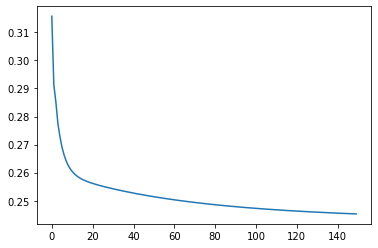

In [6]:
plt.plot(range(150),cost_func)

### 3. Prédiction

A quelle classe apartient les deux points suivants: x1=(1,5); x2(3,1) 

In [9]:
x1=np.array([1,5,1])
x2=np.array([3,1,1])
def predict_valus(x,d):
    y=function_sigmoid(x,d)
    if y>0.5:
        return 1
    else:
        return 0
predict_valus(x2,deta1)

1

## II- Utilisation des modules python
### 1. Récuperation des données
Les données sont stocker dans le fichier banking.csv. Ce dataset contient des information collecter par un centre d'appel pour savoir si un client souscrira (1/0) à un dépôt à terme (variable y) dans une baque.

1-Recuperer les données de ce fichier dans un DataFrame data

2-Afficher les 10 premiere ligne de ce dataframe

3-Afficher le nombre de client par class (1/0)

In [8]:
import pandas as pd
#1
d=pd.read_csv("banking.csv")
#2
d.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


### 2- Entrainement et test du modèle
Dans un premier lieux, nous allons utiliser comme critères de classifiction suivants:
"age": l'age du client
"emp_var_rate": employment variation rate
"cons_conf_idx": consumer confidence index

1- Creer deux numpy array X et y

X: les trois colonne "age","emp_var_rate" et "cons_conf_idx"

y: "y"

2- Nous allons utiliser **80%** du dataSet pour l'entrainement et **20%** pour le teste du modèle. utiliser la méthode **train_test_split()** du module **sklearn.model_selection** pour créer ces deux sous ensembles (X_train,X_test,y_train,y_test).

3- Creer un objet **LogisticRegression** du module **sklearn.linear_model** et utiliser **(X_train,y_train)** pour entrainer le model à l'aide la méthode **fit()** du même objet.

4- Utiliser la méthode **predict(X_test)** pour predire les classe des élément de X_test : y_pred

5- Les performences du modele sont alors mesurer à l'aide 4 metriques:
**TP: Nombre de True positives y_test==y_pred==1**

**TN: Nombre de True negatives y_test==y_pred==0**

**FP: Nombre de False positives y_test!=y_pred==1**

**FN: Nombre de False negatives y_test!=y_pred==0**


**$$Accuracy = (TP+TN)/(TP+TN+FP+FN) $$**

Calculer la precision de ce modèle?

6- Ces 4 metriques forment ce qu'on appel une **Confusion Matrix** disponible comme méthode dans le module **sklearn.metrics** :  **Confusion Matrix(y_test, y_pred)**

Recalculer precision de ce modèle on utilisant cette matrice de confusion

In [71]:
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,confusion_matrix
#1
x=np.array(d[["age","emp_var_rate","cons_price_idx"]])
y=np.array(d["y"])
#2
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1)
#3
modele=LogisticRegression().fit(x_train,y_train)
#4
y_predected=modele.predict(x_test)
print(y_predected)
#5
print("score :",modele.score(x_test,y_test),"prcision :",precision_score(y_test, y_predected, average='macro'))
#6
confusion_matrix(y_test,y_predected)

[0 0 0 ... 0 0 0]
score : 0.8892935178441369 prcision : 0.7508128098837682


(4119, 3)

### 3- prediction
Voici des information de trois clients:

client1:  {"age": 55, "emp_var_rate": -2.9, "cons_conf_idx": 31.4}

client2:  {"age": 45, "emp_var_rate": 3.7,"cons_conf_idx": 4}

client3:  {"age": 39, "emp_var_rate": 3.3,"cons_conf_idx": 6}

1- Créer un DataFrame à partir de ce données

2- Lequel de ces client souscrira à un dépôt à terme

In [59]:
# df=pd.read_csv("file.csv")
x=[{"age": 55, "emp_var_rate": -2.9, "cons_conf_idx": 31.4},
  {"age": 45, "emp_var_rate": 3.7,"cons_conf_idx": 4},
  {"age": 39, "emp_var_rate": 3.3,"cons_conf_idx": 6}]
for item in x:
    df=df.append(item,ignore_index=True)
df.to_csv(r'file.csv', index = False, header = True)

In [89]:
dt=pd.read_csv("file.csv")
x2=np.array(dt[["age","emp_var_rate","cons_conf_idx"]])
y_pred=modele.predict(x2)